## DBSCAN

Demo: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [2]:
from sklearn.cluster import DBSCAN
#?DBSCAN

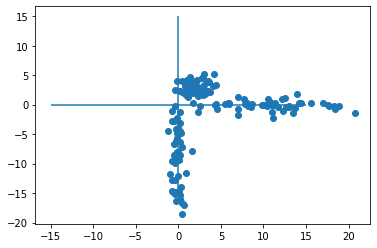

In [3]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

Uruchom DBSCAN

In [16]:
model = DBSCAN(eps = 1.7, min_samples = 2)
labels = model.fit_predict(points)

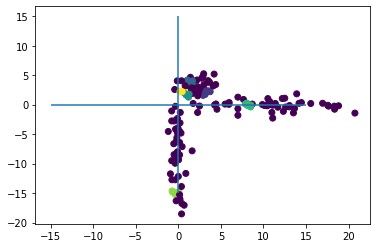

In [5]:
plt.scatter(points[:,0],points[:,1],c=labels)

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

In [6]:
from sklearn.neighbors import NearestNeighbors

In [13]:
neigh = NearestNeighbors(n_neighbors = 4)

neigh.fit(points)

distances, indices = neigh.kneighbors(points)
distances = distances[:,1:]

avg_distances = np.mean(distances, axis=1)
sorted_avg_distances = np.sort(avg_distances)

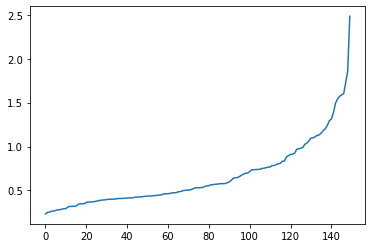

In [15]:
plt.plot(sorted_avg_distances)

In [ ]:
model = DBSCAN()
labels = model.fit_predict(points)

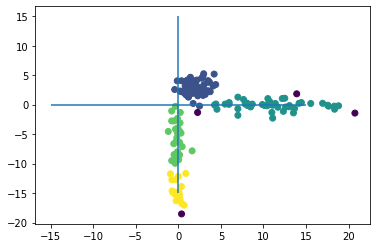

In [17]:
model = DBSCAN(eps = 1.5, min_samples = 4)
labels = model.fit_predict(points)

plt.scatter(points[:,0],points[:,1],c=labels)
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

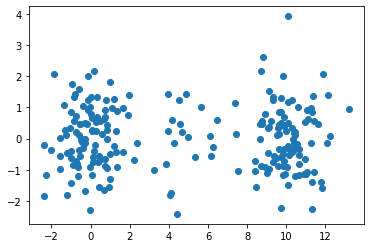

In [18]:
rnd.seed(12345)
data = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),100),
                    rnd.multivariate_normal((5,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((10,0),np.array([[1,0],[0,1]]),100)],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

Spróbuj tak dobrać parametry, żeby wykryć 2 grupy (bardziej zwarte części z rysunku)

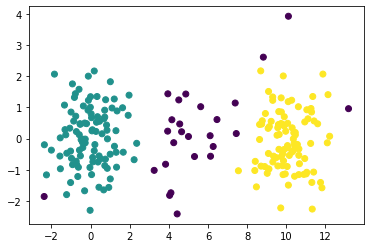

In [19]:
model = DBSCAN(eps = 1, min_samples = 9)
labels = model.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [20]:
# rekomendowane parametry

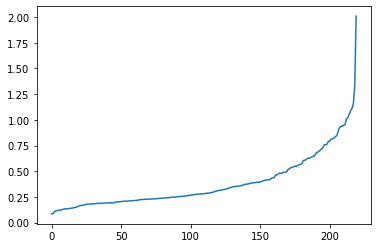

In [21]:
neigh = NearestNeighbors(n_neighbors = 4)

neigh.fit(data)

distances, indices = neigh.kneighbors(data)
distances = distances[:,1:]

avg_distances = np.mean(distances, axis=1)
sorted_avg_distances = np.sort(avg_distances)
plt.plot(sorted_avg_distances)

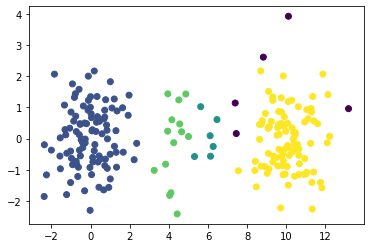

In [37]:
model = DBSCAN(eps = 1, min_samples = 4)
labels = model.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

### Analiza skupień na danych przestrzennych

In [96]:
import pandas as pd

dane = pd.read_csv("Data/summer-travel-gps-full_okrojone.csv")
dane.head()

,lat,lon,date
0,51.481292,-0.451011,05/14/2014 09:07
1,51.474005,-0.450999,05/14/2014 09:22
2,51.478199,-0.446081,05/14/2014 10:51
3,51.478199,-0.446081,05/14/2014 11:24
4,51.474146,-0.451562,05/14/2014 11:38


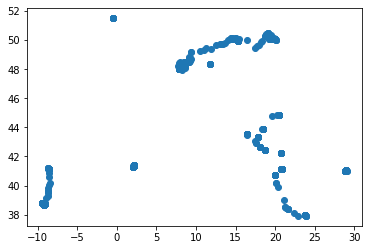

In [44]:
plt.scatter(dane.iloc[:,1],dane.iloc[:,0])
plt.show()

#### Zadanie: wykrycie istotnych punktów podróży (w uproszczeniu miejsc, gdzie przebywaliśmy dłużej)

Zwizualizować wyniki.

Ściągnąć współrzedne miast europejskich z http://www.clearlyandsimply.com/clearly_and_simply/2010/10/geocoding-databases-for-europe.html i przyporządkować miasta do punktów.

In [45]:
dane.shape

(1759, 3)

In [41]:
X = dane[['lat', 'lon']]

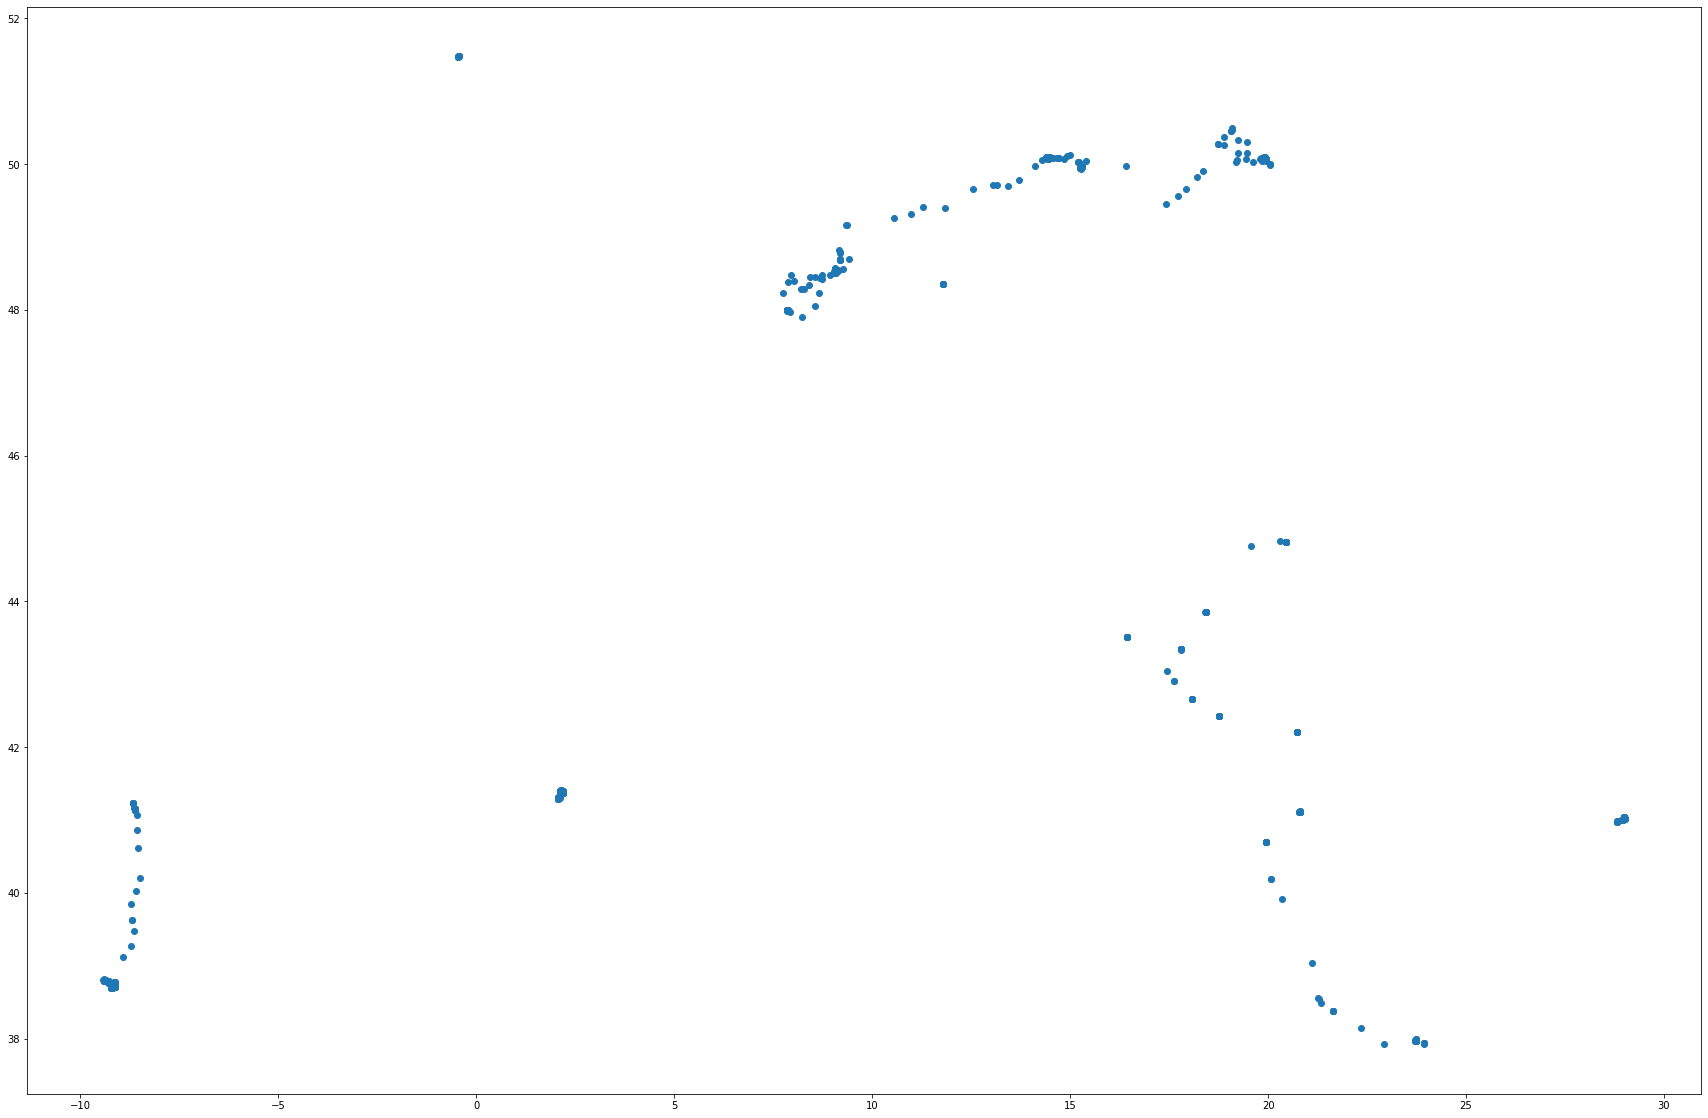

In [46]:
plt.figure(figsize=(30,20))
plt.scatter(dane.lon, dane.lat)
plt.show()

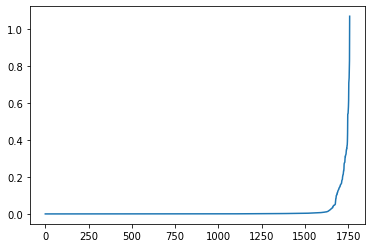

In [48]:
neigh = NearestNeighbors(n_neighbors = 4)

neigh.fit(X)

distances, indices = neigh.kneighbors(X)
distances = distances[:,1:]

avg_distances = np.mean(distances, axis=1)
sorted_avg_distances = np.sort(avg_distances)
plt.plot(sorted_avg_distances)

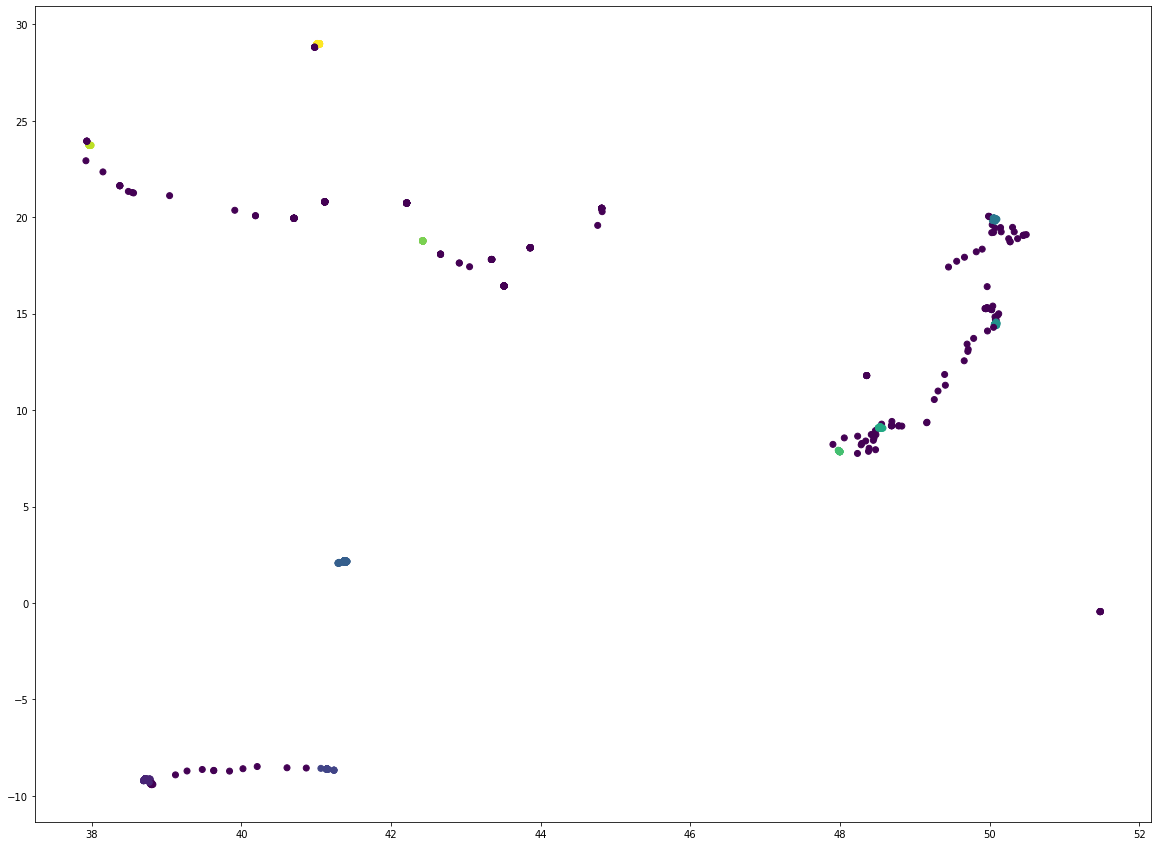

In [72]:
model = DBSCAN(eps = 0.1,min_samples = 40)
labels = model.fit_predict(X)

plt.figure(figsize=(20,15))
plt.scatter(X.lat,X.lon,c=labels)
plt.show()

In [73]:
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([308, 160,  73, 646,  85,  95, 133,  54,  51,  67,  87]))

In [ ]:
# wczytujemy dane z miastami
# mapujemy

In [88]:
cities = pd.read_csv('Data/european_cities_eu_standard.csv', sep = ';', decimal=',')

In [89]:
cities

,European City,Country (ISO 3166-2),Latitude,Longitude
0,Andorra la Vella,AD,42.50000,1.5000
1,Canillo,AD,42.58330,1.6667
2,Encamp,AD,42.53330,1.6333
3,Escaldes-Engordany,AD,42.50000,1.5667
4,La Massana,AD,42.56670,1.4833
...,...,...,...,...
252776,zkonak,TR,37.43750,42.1908
252777,zml,TR,39.20365,35.8335
252778,Zonguldak,TR,41.45560,31.7897
252779,zpinar,TR,37.93410,42.3046


In [99]:
visited_places = dane.groupby(model.labels_).mean()

In [100]:
visited_places

,lat,lon
-1,44.229301,15.499130
0,38.714959,-9.146195
1,41.147990,-8.614548
2,41.381009,2.156992
3,50.061723,19.931725
4,50.077716,14.440023
5,48.523039,9.056752
6,47.991538,7.864605
7,42.423492,18.771581
8,37.969904,23.728642


In [149]:
cities[['Latitude', 'Longitude']]

,Latitude,Longitude
0,42.50000,1.50000
1,42.58330,1.66670
2,42.53330,1.63330
3,42.50000,1.56670
4,42.56670,1.48330
...,...,...
995,47.40998,13.78002
996,47.30950,10.91430
997,47.28330,11.43330
998,47.20000,10.76670


In [129]:
from sklearn.metrics import pairwise_distances_argmin

In [108]:
np.array([0, 0])

array([0, 0])

In [156]:
X = np.array(visited_places.drop(-1)).copy(order='C')

In [157]:
Y = np.array(cities[['Latitude', 'Longitude']]).copy(order='C')

In [160]:
indexes = pairwise_distances_argmin(X,Y)

In [165]:
sel_cities = cities['European City'].iloc[indexes]
sel_cities

231881                  Lisboa
237841                   Porto
74504                Barcelona
218587                   Krakw
54324                Vinohrady
66775                  Tbingen
58326     Freiburg im Breisgau
190987               Vitaljina
251794                   Cesme
252168                Istanbul
Name: European City, dtype: object

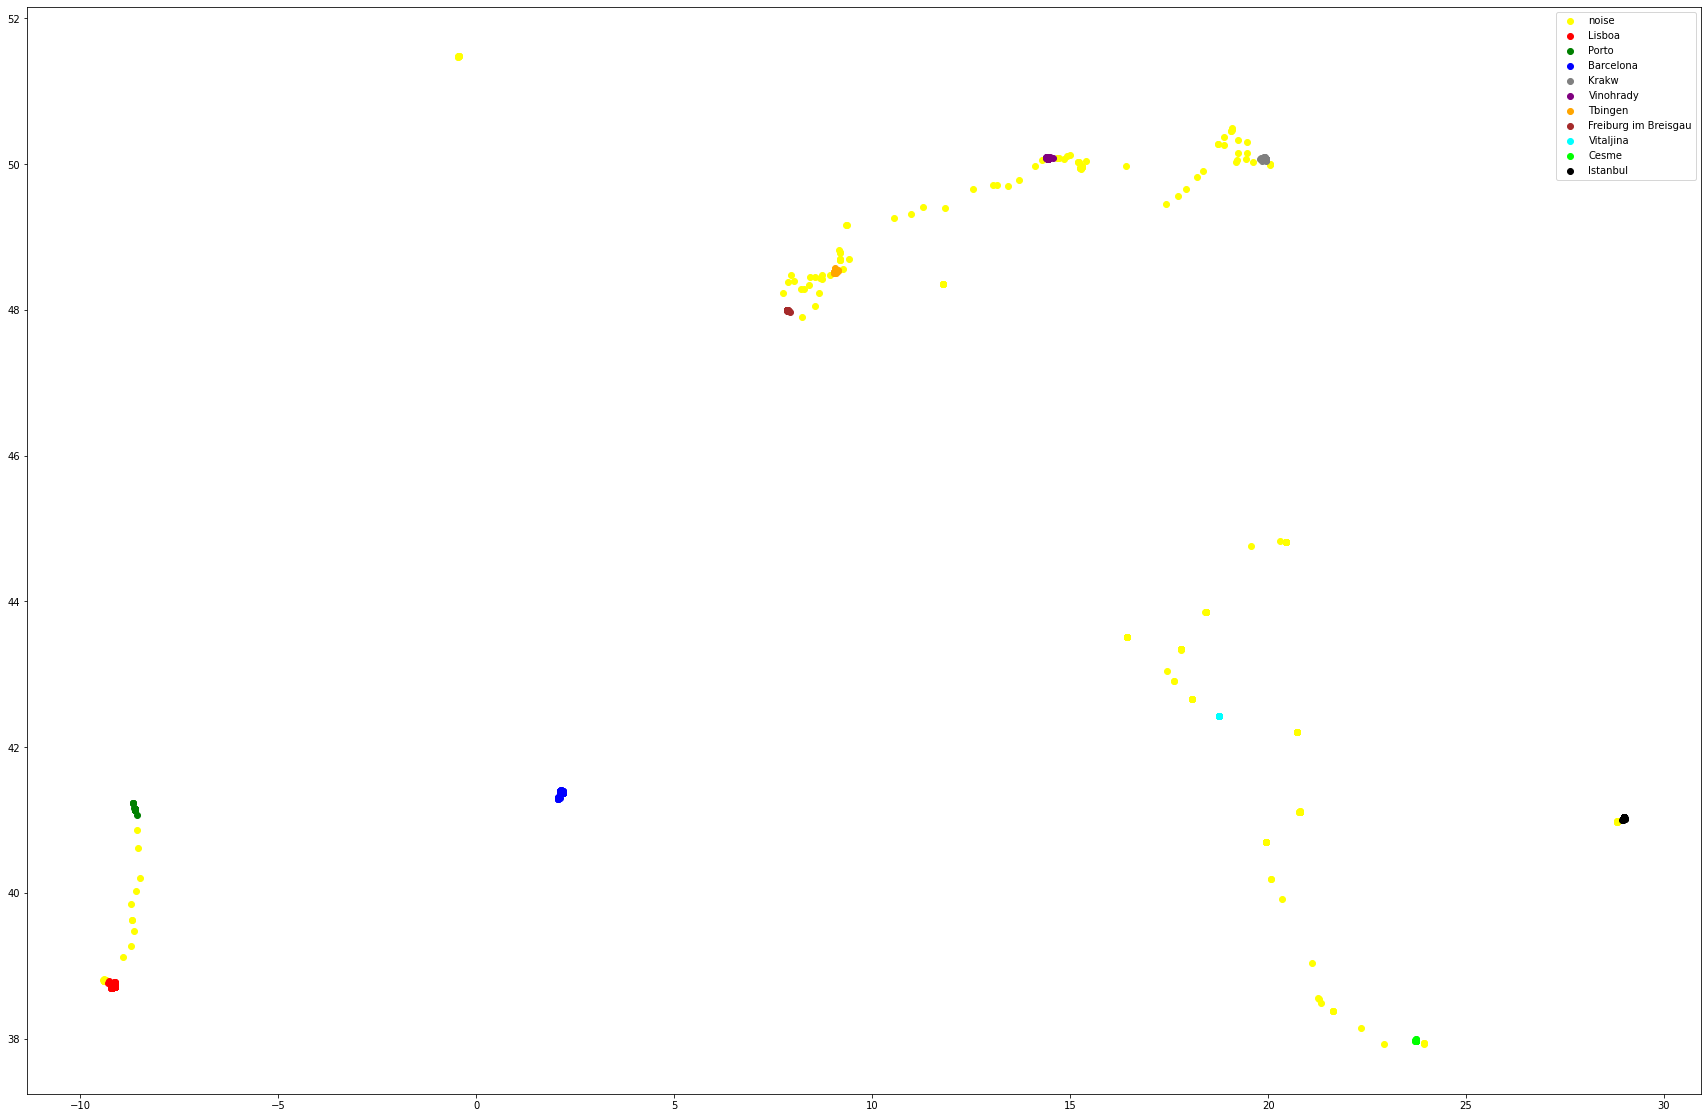

In [166]:

plt.figure(figsize=(30,20))
colors = np.array(["red","green","blue","grey","purple","orange","brown","cyan","lime","black","yellow"])
for i in np.unique(model.labels_):
    city = sel_cities.iloc[i] if i>=0 else "noise"
    plt.scatter(dane[model.labels_ == i]['lon'], dane[model.labels_ == i]['lat'], c=colors[i], label=city)
plt.legend()
plt.show()

## Birch

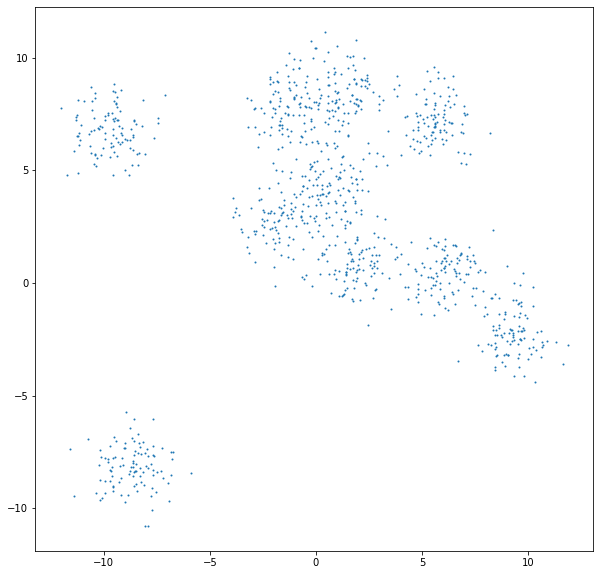

In [167]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [168]:
from sklearn.cluster import Birch

b = Birch(threshold=1,n_clusters=None)
b.fit(data)

Birch(n_clusters=None, threshold=1)

In [169]:
b.subcluster_centers_

array([[  0.65699291,   8.00069438],
       [ -1.35867618,   2.55794936],
       [  0.3614498 ,   5.46440057],
       [  5.58257078,   0.29396862],
       [  0.25882045,   0.80899775],
       [  2.15510663,   2.1101151 ],
       [  7.31950896,   0.40489509],
       [  5.97039481,   7.91377766],
       [ -8.01415614,  -8.15111027],
       [ -9.71866948,   7.4970512 ],
       [  9.13401918,  -1.84849862],
       [  1.94821493,   4.69619738],
       [  1.94787564,   0.31134485],
       [  0.21674859,   3.64408369],
       [-10.11383596,   5.57292216],
       [ -1.50053598,   7.38181111],
       [  4.73076823,   6.64346277],
       [  5.9722929 ,   6.75365535],
       [ -9.89306681,  -8.44840359],
       [  2.19256109,   8.50320131],
       [ -8.6473362 ,   6.47515474],
       [ -8.78313524,  -6.79335004],
       [  4.15524325,   0.38318576],
       [  0.93226682,  10.06432171],
       [  6.20390339,   1.32105268],
       [  5.1467883 ,   9.08128783],
       [ -1.249771  ,   9.09356363],
 

In [170]:
len(b.subcluster_centers_)

40

In [171]:
b.subcluster_labels_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

Zwizualizuj wyniki (podgrupy Birch)

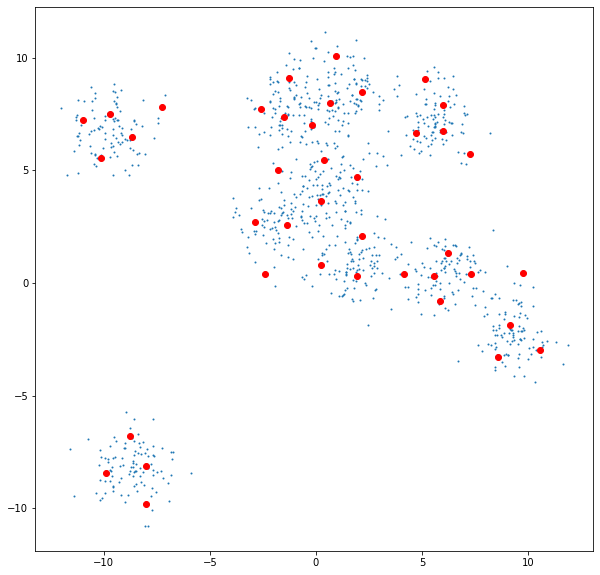

In [176]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0], b.subcluster_centers_[:,1],c='red')
plt.show()

Uruchom KMeans na środkach podgrup z Birch i zwizualizuj.

In [177]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
cluster_labels = model.fit_predict(b.subcluster_centers_)
cluster_labels

array([6, 8, 1, 7, 4, 4, 7, 3, 2, 5, 0, 1, 4, 1, 5, 9, 3, 3, 2, 6, 5, 2,
       4, 6, 7, 3, 9, 8, 3, 1, 0, 5, 7, 6, 2, 5, 0, 9, 8, 7], dtype=int32)

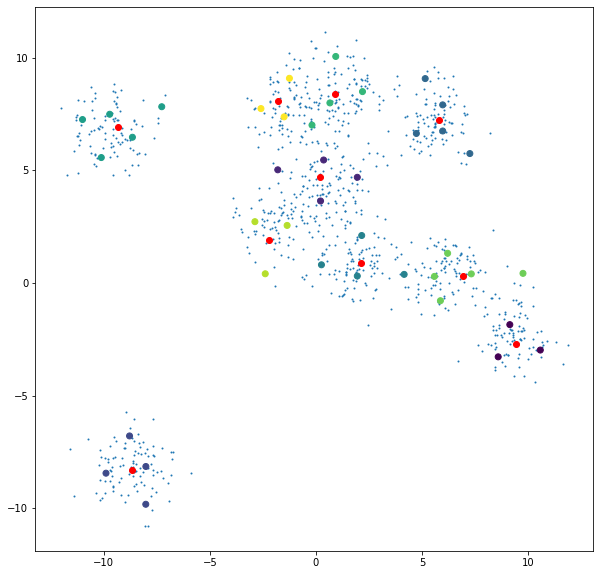

In [180]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0], b.subcluster_centers_[:,1],c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')
plt.show()

Uruchom Birch z KMeans jako klasteryzacją w kolejnym etapie

In [194]:
from sklearn.cluster import Birch

b = Birch(threshold=1,n_clusters=KMeans(n_clusters=10))
b.fit(data)

Birch(n_clusters=KMeans(n_clusters=10), threshold=1)

In [195]:
b.subcluster_centers_

array([[  0.65699291,   8.00069438],
       [ -1.35867618,   2.55794936],
       [  0.3614498 ,   5.46440057],
       [  5.58257078,   0.29396862],
       [  0.25882045,   0.80899775],
       [  2.15510663,   2.1101151 ],
       [  7.31950896,   0.40489509],
       [  5.97039481,   7.91377766],
       [ -8.01415614,  -8.15111027],
       [ -9.71866948,   7.4970512 ],
       [  9.13401918,  -1.84849862],
       [  1.94821493,   4.69619738],
       [  1.94787564,   0.31134485],
       [  0.21674859,   3.64408369],
       [-10.11383596,   5.57292216],
       [ -1.50053598,   7.38181111],
       [  4.73076823,   6.64346277],
       [  5.9722929 ,   6.75365535],
       [ -9.89306681,  -8.44840359],
       [  2.19256109,   8.50320131],
       [ -8.6473362 ,   6.47515474],
       [ -8.78313524,  -6.79335004],
       [  4.15524325,   0.38318576],
       [  0.93226682,  10.06432171],
       [  6.20390339,   1.32105268],
       [  5.1467883 ,   9.08128783],
       [ -1.249771  ,   9.09356363],
 

In [196]:
len(b.subcluster_centers_)

40

In [197]:
b.subcluster_labels_

array([1, 7, 4, 0, 9, 9, 0, 5, 2, 3, 6, 4, 9, 4, 3, 8, 5, 5, 2, 1, 3, 2,
       0, 1, 0, 5, 8, 7, 5, 4, 6, 3, 0, 8, 2, 3, 6, 8, 7, 6], dtype=int32)

Zwizualizuj wyniki (podgrupy Birch)

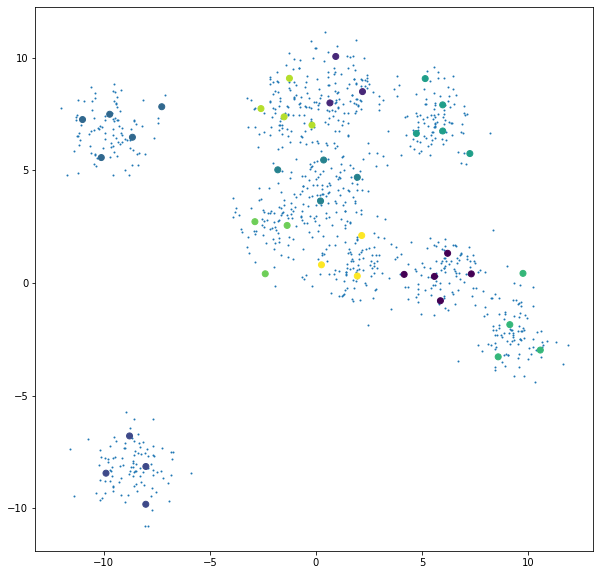

In [200]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0], b.subcluster_centers_[:,1],c=b.subcluster_labels_)
#plt.scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1],c='black')
plt.show()

In [189]:
?Birch

Init signature:
Birch(
    *,
    threshold=0.5,
    branching_factor=50,
    n_clusters=3,
    compute_labels=True,
    copy=True,
)
Docstring:     
Implements the BIRCH clustering algorithm.

It is a memory-efficient, online-learning algorithm provided as an
alternative to :class:`MiniBatchKMeans`. It constructs a tree
data structure with the cluster centroids being read off the leaf.
These can be either the final cluster centroids or can be provided as input
to another clustering algorithm such as :class:`AgglomerativeClustering`.

Read more in the :ref:`User Guide <birch>`.

.. versionadded:: 0.16

Parameters
----------
threshold : float, default=0.5
    The radius of the subcluster obtained by merging a new sample and the
    closest subcluster should be lesser than the threshold. Otherwise a new
    subcluster is started. Setting this value to be very low promotes
    splitting and vice-versa.

branching_factor : int, default=50
    Maximum number of CF subclusters in each node. 

Pokoloruj środki podgrup Birch wg ich przyporządkowania do klastrów KMeans

## Case study - grupowanie wejść na stronę

Opis formatu danych https://kdd.ics.uci.edu/databases/msnbc/description.txt

In [201]:
data_raw = pd.read_csv("Data/msnbc990928.seq",skiprows=3)
data_raw.head()

,% Sequences:
0,1 1
1,2
2,3 2 2 4 2 2 2 3 3
3,5
4,1


In [202]:
pd.read_csv("Data/msnbc990928.seq")

,% Different categories found in input file:
0,frontpage news tech local opinion on-air misc ...
1,% Sequences:
2,1 1
3,2
4,3 2 2 4 2 2 2 3 3
...,...
989815,9 9 9 9 9 9 9 9
989816,1 2
989817,1 1 1 1
989818,1 1 1 1 1 1 1


In [203]:
category = pd.read_csv("Data/msnbc990928.seq").loc[0][0].split()
category

['frontpage',
 'news',
 'tech',
 'local',
 'opinion',
 'on-air',
 'misc',
 'weather',
 'msn-news',
 'health',
 'living',
 'business',
 'msn-sports',
 'sports',
 'summary',
 'bbs',
 'travel']

Przeprowadź klastrowanie - przygotuj odpowiednio dane, zwróć uwagę na przypadki odstające

In [204]:
import re

In [205]:
re.findall('\\b\w+\\b', '1 1 4 10. 5')

['1', '1', '4', '10', '5']

In [206]:
from sklearn.feature_extraction.text import CountVectorizer

In [208]:
cv = CountVectorizer(token_pattern = '\\b\w+\\b')

data_raw["% Sequences:"]

cv.fit(data_raw["% Sequences:"])

cv.vocabulary_

In [217]:
vocab = {str(i): i-1 for i in range(1, len(category)+1)}
vocab

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 '10': 9,
 '11': 10,
 '12': 11,
 '13': 12,
 '14': 13,
 '15': 14,
 '16': 15,
 '17': 16}

In [221]:
cv = CountVectorizer(token_pattern = '\\b\w+\\b', vocabulary=vocab)

data_raw["% Sequences:"]

data = cv.fit_transform(data_raw["% Sequences:"])

data.todense()

matrix([[2, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 5, 3, ..., 0, 0, 0],
        ...,
        [4, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [244]:
df = pd.DataFrame(data.todense(), columns=np.array(category)[[int(elem)-1 for elem in cv.get_feature_names_out()]])

In [258]:
df = df[df[list(df.columns)].sum(axis=1)<50]

In [259]:
df = df[df.iloc[:,1:].sum(axis=1) > 0]

In [260]:
df = df[df.sum(axis = 1) > 1]

In [261]:
df

,frontpage,news,tech,local,opinion,on-air,misc,weather,msn-news,health,living,business,msn-sports,sports,summary,bbs,travel
2,0,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,3,3,4,0,0,0,0,0,0,0,0,0
9,0,0,1,6,1,1,0,0,1,3,0,0,0,0,0,0,0
10,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989806,0,3,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
989809,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989811,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
989813,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0


In [263]:
df

,frontpage,news,tech,local,opinion,on-air,misc,weather,msn-news,health,living,business,msn-sports,sports,summary,bbs,travel
2,0,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,3,3,4,0,0,0,0,0,0,0,0,0
9,0,0,1,6,1,1,0,0,1,3,0,0,0,0,0,0,0
10,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989806,0,3,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
989809,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989811,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
989813,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0


In [264]:
from sklearn.preprocessing import Normalizer

data2 = Normalizer("l1").fit_transform(df)
data2

array([[0.        , 0.55555556, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07692308, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88888889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [268]:
from sklearn.cluster import MiniBatchKMeans

In [269]:
mbk = MiniBatchKMeans(n_clusters=11)
mbk.fit(data2)

MiniBatchKMeans(n_clusters=11)

In [270]:
mbk.cluster_centers_

array([[5.72083801e-02, 1.93761858e-02, 1.63635943e-02, 8.99706179e-03,
        1.06468505e-03, 5.72240467e-03, 3.31084458e-03, 4.25993144e-03,
        1.25818203e-02, 8.72097171e-03, 6.19848466e-03, 8.27932098e-01,
        5.16527451e-03, 1.54672782e-02, 5.33774779e-03, 9.37031484e-04,
        1.35620595e-03],
       [5.16014112e-02, 6.62565382e-02, 3.45769452e-01, 2.74602481e-02,
        1.00852576e-01, 1.67799593e-02, 4.42262125e-02, 1.43062332e-02,
        2.01868020e-02, 1.04684110e-01, 9.45221135e-02, 3.40500765e-02,
        1.41464012e-02, 4.11697942e-02, 9.49387733e-03, 3.81525098e-03,
        1.06789430e-02],
       [6.85317959e-02, 7.70800193e-01, 2.63031932e-02, 1.34020258e-02,
        6.17591722e-03, 1.19412187e-02, 4.83460914e-03, 1.19277570e-02,
        6.28164168e-03, 1.84732282e-02, 8.53517042e-03, 2.29803237e-02,
        1.36389382e-03, 2.00271871e-02, 6.63365978e-03, 1.06202209e-04,
        1.68198264e-03],
       [1.39328011e-01, 5.53679204e-02, 1.60649798e-02, 2.835

In [273]:
np.unique(mbk.labels_, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([ 27823,  53139,  50911,  48086,  56371,  38873,  40444,  45389,
         48608, 108542,  51093]))

In [274]:
import seaborn as sns

<AxesSubplot:>

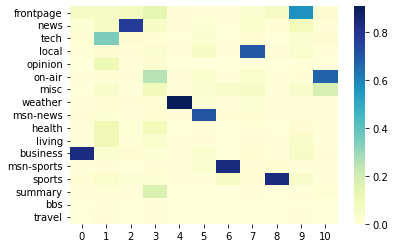

In [278]:
sns.heatmap(pd.DataFrame(mbk.cluster_centers_, columns=category).T,  cmap='YlGnBu')

### Klasteryzacja obrazów

In [279]:
from sklearn.datasets import fetch_openml

fmnist = fetch_openml('Fashion-MNIST')
fmnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

![Fashion MNIST](https://miro.medium.com/max/788/1*ogbAotjStIKLG4TyLzzDtQ.png)

In [280]:
fmnist.data.shape

(70000, 784)

Zrób klasteryzację KMeans bezpośrednio na danych oraz z użyciem PCA. Porównaj wyniki z użyciem V-measure.

In [ ]:
mbk = MiniBatchKMeans(n_clusters = 10)

In [281]:
groups = mbk.fit_predict(fmnist.data)

In [282]:
from sklearn.metrics import v_measure_score

In [285]:
v_measure_score(fmnist.target, groups)

0.4782472154816009

Zwizualizuj kilka przykładów z poszczególnych klastrów.

In [288]:
cluster_index = [[] for i in range(10)]
cluster_index

[[], [], [], [], [], [], [], [], [], []]

In [293]:
groups

array([8, 4, 9, ..., 9, 3, 2], dtype=int32)

In [290]:
for i, label in enumerate(groups):
    cluster_index[label].append(i)

IndexError: list index out of range

IndexError: list index out of range

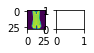

In [292]:
cluster_no = 0
num = 100

for i in range(1,num):
    plt.subplot(10,10,i)
    plt.imshow(fmnist.data.iloc[cluster_index[cluster_no][i]].values.reshape(28,28))

plt.show()   

Zrób rozkład dla każdego klastra ile obiektów poszczególnych klas zawiera